We consider the IVP $u'=\sin[(u+t)^2]$ over $0\le t \le 4$, with $u(0)=-1$. 

In [1]:
f = (u,t) -> sin((t+u)^2);
tspan = (0.0,4.0);
u0 = -1.0;

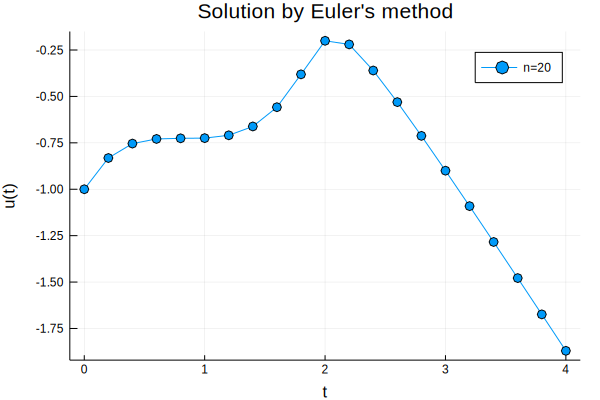

In [2]:
include("../FNC.jl")
t,u = FNC.eulerivp(f,tspan,u0,20);

using Plots
plot(t,u,m=:o,label="n=20",
    xlabel="t", ylabel="u(t)", title="Solution by Euler's method" )

We could define a different interpolant to get a smoother picture above, but the derivation assumed the piecewise linear interpolant, so it is the most meaningful one. We can instead request more steps to make the interpolant look smoother.

In [3]:
t,u = FNC.eulerivp(f,tspan,u0,200)
plot!(t,u,label="n=200")

Increasing $n$ changed the solution noticeably. Since we know that interpolants and finite differences become more accurate as $h\to 0$, we should expect that from Euler's method too.

We don't have an exact solution to compare to, so we will use a `DifferentialEquations` solver to construct an accurate solution. 

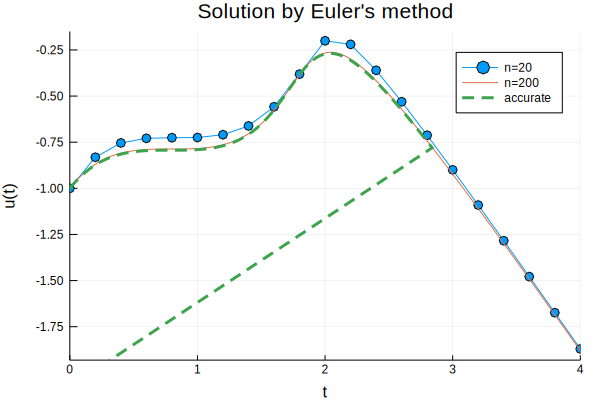

In [4]:
using DifferentialEquations
ivp = ODEProblem((u,p,t)->f(u,t),u0,tspan)
u_exact = solve(ivp,reltol=1e-14,abstol=1e-14);

plot!(u_exact,l=:dash,label="accurate")

Now we can perform a convergence study. 

In [5]:
n = @. 50*2^(0:5)
err = zeros(size(n))
for (j,n) = enumerate(n)
    t,u = FNC.eulerivp(f,tspan,u0,n)
    err[j] = maximum( @. abs(u_exact(t)-u) )
end

using DataFrames
DataFrame(n=n,error=err)

,n,error
,Int64,Float64
1,50,0.0299962
2,100,0.0142292
3,200,0.00694433
4,400,0.00342947
5,800,0.0017041
6,1600,0.000849416


The error is almost perfectly halved at each step, so we expect that a log-log plot will reveal first-order convergence.

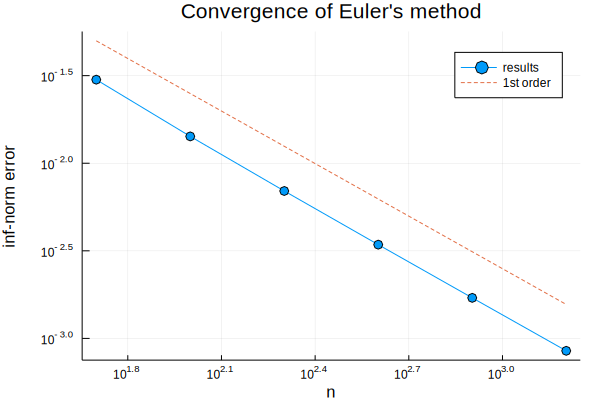

In [6]:
plot(n,err,m=:o,label="results", 
    xaxis=(:log10,"n"), yaxis=(:log10,"inf-norm error"), title="Convergence of Euler's method")
plot!(n,0.05*(n/n[1]).^(-1),l=:dash,label="1st order")